# Import Required Libraries for data handling and analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing required packages for -

In [2]:
#1 preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

#2 modeling algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier


#3 model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve,auc

# Elementary Data Analysis(EDA)

In [3]:
#data extraction
df=pd.read_excel(r"C:\Users\D. PURNA\Desktop\New folder\Data Set.xlsx")

In [4]:
#display first five rows
df.head()

,Employee_ID,Age,years_of_experience,Gender,MaritalStatus,Department,Job_role,Education_level,Work_Environment_Satisfaction_Level,JobInvolvement,...,Project_Completion,Working_Status,Psycho_social_indicators,Feedback,Over_time,Percentage_of_Attendence,Effected_with_corona,Percent_salary_hike,Net_connectivity,Performance_Rating
0,1000,51.0,26,Male,Single,Computers_and_information_technology,Database_administrator,Bachelor,High,High,...,14,WFH,Very_good,Outstanding,0,89,0.0,15.0,1.0,Outstanding
1,1001,24.0,2,Female,Single,Finance,Loan_officer,Bachelor,High,Very_High,...,1,WFH,Excellent,Very_good,1,71,0.0,13.0,1.0,Outstanding
2,1002,20.0,1,Male,Single,Human_Resource,HR_manager,Bachelor,Very_High,High,...,1,WFO,Very_good,Outstanding,0,87,0.0,14.0,1.0,Excellent
3,1003,29.0,3,Female,Married,Human_Resource,Recruiting_and_Staffing,Master,Very_High,Very_High,...,5,WFO,Very_good,Very_good,1,84,1.0,14.0,1.0,Outstanding
4,1004,28.0,4,Male,Single,Finance,Financial_adviser,Master,High,Medium,...,5,WFH,Good,Good,1,60,0.0,8.0,1.0,Good


In [5]:
#display the numbver of rows and columns
df.shape

(5500, 30)

In [6]:
df.dtypes.value_counts()

object     17
int64       8
float64     5
dtype: int64

In [7]:
#check if missing values are present
#to display boolean values for missing values.

df.isnull().sum()

Employee_ID                              0
Age                                     55
years_of_experience                      0
Gender                                  44
MaritalStatus                            0
Department                              64
Job_role                                47
Education_level                         95
Work_Environment_Satisfaction_Level     88
JobInvolvement                           0
JobLevel                                 0
JobSatisfaction                          0
Annual_Income_in_lacs                   42
RelationshipSatisfaction                 0
Working_hrs_per_day                      0
Training_Time_in_months                  0
Work_Life_Balance                      106
Behaviourial_Competence                 96
On_Time_Delivery                        70
Ticket_Solving_Management                0
Project_Completion                       0
Working_Status                           0
Psycho_social_indicators                 0
Feedback   

In [8]:
df.dtypes

Employee_ID                              int64
Age                                    float64
years_of_experience                      int64
Gender                                  object
MaritalStatus                           object
Department                              object
Job_role                                object
Education_level                         object
Work_Environment_Satisfaction_Level     object
JobInvolvement                          object
JobLevel                                 int64
JobSatisfaction                         object
Annual_Income_in_lacs                  float64
RelationshipSatisfaction                object
Working_hrs_per_day                      int64
Training_Time_in_months                  int64
Work_Life_Balance                       object
Behaviourial_Competence                 object
On_Time_Delivery                        object
Ticket_Solving_Management               object
Project_Completion                       int64
Working_Statu

<AxesSubplot:>

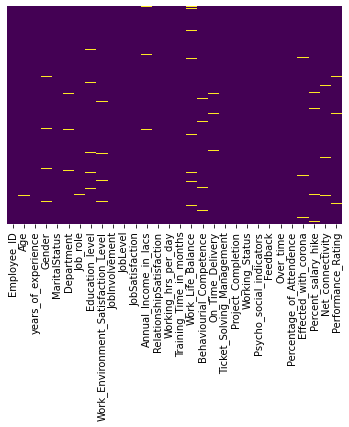

In [9]:
#missing data heat map
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handling Missing Values

In [10]:
df['Age'].mean()

40.91974288337925

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df['Gender'].value_counts()

Female    2760
Male      2696
Name: Gender, dtype: int64

In [13]:
df['Gender'].fillna('Female',inplace=True)

In [14]:
df['Department'].value_counts()

Human_Resource                          919
Computers_and_information_technology    828
Digital_Marketing                       715
Research_and_Development                677
Finance                                 625
Quality_assurance                       585
Customer_service                        560
Management                              527
Name: Department, dtype: int64

In [15]:
df['Department'].fillna('Human_Resource',inplace=True)

In [16]:
df['Job_role'].value_counts()

HR_manager                              245
Safety_and_Compliance                   196
Software_application_packager           188
Marketing_assistant                     170
Product_marketing                       167
Recruiting_and_Staffing                 155
Talent_Management                       152
R&D_analyst                             149
Compensation_and_Benefits               143
Customer_service_representative         143
Customer_service_supervisor             142
Customer_support_engineer               140
Strategic_Planner                       139
Customer_service_manager                137
R&D_Manager                             133
R&D_scientist                           129
R&D_engineer                            124
Systems_analyst                         123
Data_scientist                          119
Marketing_analyst                       116
Training_and_Development                115
Network_administrator                   113
Full_stack_developer            

In [17]:
df['Job_role'].fillna('HR_manager',inplace=True)

In [18]:
df['Education_level'].value_counts()

Bachelor     2236
Master       1755
Doctor        928
PUC           247
Below_PUC     239
Name: Education_level, dtype: int64

In [19]:
df['Education_level'].fillna('Bachelor',inplace=True)

In [20]:
df['Work_Environment_Satisfaction_Level'].value_counts()

High         2482
Very_High    1219
Medium        882
Low           829
Name: Work_Environment_Satisfaction_Level, dtype: int64

In [21]:
df['Work_Environment_Satisfaction_Level'].fillna('High',inplace=True)

In [22]:
df['Work_Life_Balance'].value_counts()

Better    1957
Best      1373
Good      1259
Bad        805
Name: Work_Life_Balance, dtype: int64

In [23]:
df['Work_Life_Balance'].fillna('Better',inplace=True)

In [24]:
df['Behaviourial_Competence'].value_counts()

Good            1612
Very_good       1333
Excellent        882
Poor             543
In_adequate      540
Satisfactory     494
Name: Behaviourial_Competence, dtype: int64

In [25]:
df['Behaviourial_Competence'].fillna('Good',inplace=True)

In [26]:
df['On_Time_Delivery'].value_counts()

Excellent        1686
Good             1623
Poor             1086
good              439
fair              300
satistfactory     296
Name: On_Time_Delivery, dtype: int64

In [27]:
df['On_Time_Delivery'].fillna('Excellent',inplace=True)

In [28]:
df['Effected_with_corona'].value_counts()

0.0    3781
1.0    1654
Name: Effected_with_corona, dtype: int64

In [29]:
df['Effected_with_corona'].fillna(0.0,inplace=True)

In [30]:
df['Percent_salary_hike'].mean()

9.524453501296776

In [31]:
df['Percent_salary_hike'].fillna(df['Percent_salary_hike'].mean(),inplace=True)

In [32]:
df['Annual_Income_in_lacs'].mean()

17.054415536826678

In [33]:
df['Annual_Income_in_lacs'].fillna(df['Annual_Income_in_lacs'].mean(),inplace=True)

In [34]:
df['Performance_Rating'].value_counts()

Outstanding    1751
Good           1491
Excellent      1094
Low            1084
Name: Performance_Rating, dtype: int64

In [35]:
df['Performance_Rating'].fillna('Outstanding',inplace=True)

In [36]:
df['Net_connectivity'].value_counts()

1.0    4209
0.0    1214
Name: Net_connectivity, dtype: int64

In [37]:
df['Net_connectivity'].fillna(1.0,inplace=True)

In [38]:
df.isnull().sum()

Employee_ID                            0
Age                                    0
years_of_experience                    0
Gender                                 0
MaritalStatus                          0
Department                             0
Job_role                               0
Education_level                        0
Work_Environment_Satisfaction_Level    0
JobInvolvement                         0
JobLevel                               0
JobSatisfaction                        0
Annual_Income_in_lacs                  0
RelationshipSatisfaction               0
Working_hrs_per_day                    0
Training_Time_in_months                0
Work_Life_Balance                      0
Behaviourial_Competence                0
On_Time_Delivery                       0
Ticket_Solving_Management              0
Project_Completion                     0
Working_Status                         0
Psycho_social_indicators               0
Feedback                               0
Over_time       

<AxesSubplot:>

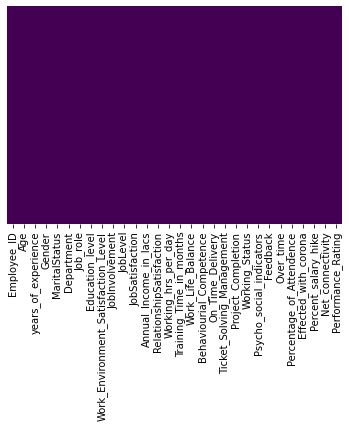

In [39]:
#missing data heat map
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handling Outliers

In [40]:
columns=['Age','JobLevel','years_of_experience','Training_Time_in_months','Project_Completion','Percent_salary_hike','Annual_Income_in_lacs','Working_hrs_per_day','Percentage_of_Attendence']
for x in columns:
    print(df[x].describe())

count    5500.000000
mean       40.919743
std        20.049683
min        20.000000
25%        30.000000
50%        40.919743
75%        50.000000
max       543.000000
Name: Age, dtype: float64
count    5500.000000
mean        2.957636
std         1.383214
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: JobLevel, dtype: float64
count    5500.000000
mean       16.244000
std        14.586515
min         0.000000
25%         5.000000
50%        16.000000
75%        25.000000
max       432.000000
Name: years_of_experience, dtype: float64
count    5500.000000
mean        3.574909
std         1.877216
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        24.000000
Name: Training_Time_in_months, dtype: float64
count    5500.000000
mean        9.331818
std         4.655575
min         1.000000
25%         5.000000
50%        11.000000
75%        13.000000
max        14.000000
Name: Project_C

<AxesSubplot:xlabel='Age'>

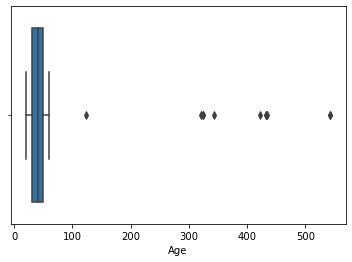

In [41]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='JobLevel'>

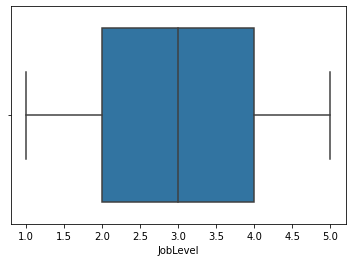

In [42]:
sns.boxplot(df['JobLevel'])

<AxesSubplot:xlabel='years_of_experience'>

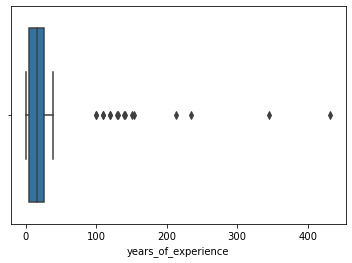

In [43]:
sns.boxplot(df['years_of_experience'])

<AxesSubplot:xlabel='Training_Time_in_months'>

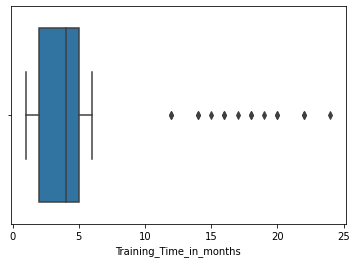

In [44]:
sns.boxplot(df['Training_Time_in_months'])

<AxesSubplot:xlabel='Project_Completion'>

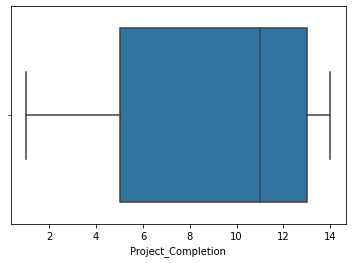

In [45]:
sns.boxplot(df['Project_Completion'])

<AxesSubplot:xlabel='Percent_salary_hike'>

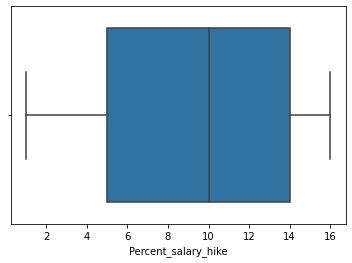

In [46]:
sns.boxplot(df['Percent_salary_hike'])

<AxesSubplot:xlabel='Annual_Income_in_lacs'>

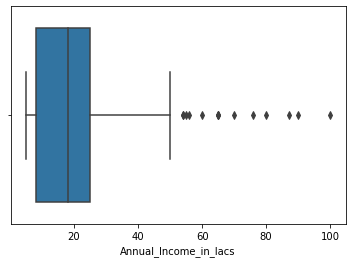

In [47]:
sns.boxplot(df['Annual_Income_in_lacs'])

<AxesSubplot:xlabel='Percentage_of_Attendence'>

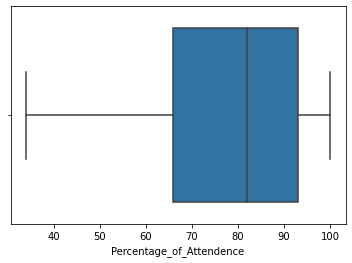

In [48]:
sns.boxplot(df['Percentage_of_Attendence'])

In [49]:
# we have Outliers in 'Age' , 'TotalWork_Experience' , 'TrainingTime__months' , 'Annual_income_LPA' .

<AxesSubplot:xlabel='Age'>

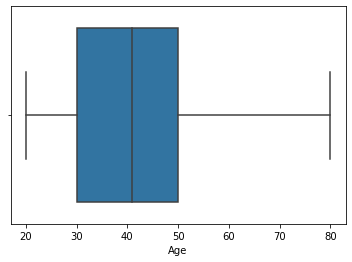

In [50]:
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
lower_limit = df['Age'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Age'].quantile(0.75) + (IQR * 1.5)
df['Age'] = pd.DataFrame(np.where(df['Age'] > upper_limit, upper_limit, np.where(df['Age'] < lower_limit, lower_limit, df['Age'])))
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Training_Time_in_months'>

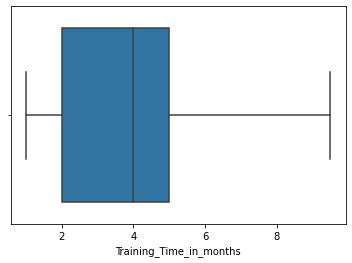

In [51]:
IQR = df['Training_Time_in_months'].quantile(0.75) - df['Training_Time_in_months'].quantile(0.25)
lower_limit = df['Training_Time_in_months'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Training_Time_in_months'].quantile(0.75) + (IQR * 1.5)
df['Training_Time_in_months'] = pd.DataFrame(np.where(df['Training_Time_in_months'] > upper_limit, upper_limit, np.where(df['Training_Time_in_months'] < lower_limit, lower_limit, df['Training_Time_in_months'])))
sns.boxplot(df.Training_Time_in_months)

<AxesSubplot:xlabel='years_of_experience'>

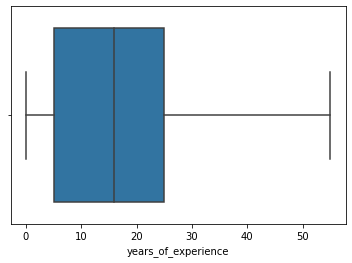

In [52]:
IQR = df['years_of_experience'].quantile(0.75) - df['years_of_experience'].quantile(0.25)
lower_limit = df['years_of_experience'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['years_of_experience'].quantile(0.75) + (IQR * 1.5)
df['years_of_experience'] = pd.DataFrame(np.where(df['years_of_experience'] > upper_limit, upper_limit, np.where(df['years_of_experience'] < lower_limit, lower_limit, df['years_of_experience'])))
sns.boxplot(df.years_of_experience)

<AxesSubplot:xlabel='Annual_Income_in_lacs'>

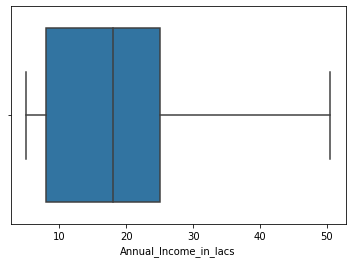

In [53]:
IQR = df['Annual_Income_in_lacs'].quantile(0.75) - df['Annual_Income_in_lacs'].quantile(0.25)
lower_limit = df['Annual_Income_in_lacs'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Annual_Income_in_lacs'].quantile(0.75) + (IQR * 1.5)
df['Annual_Income_in_lacs'] = pd.DataFrame(np.where(df['Annual_Income_in_lacs'] > upper_limit, upper_limit, np.where(df['Annual_Income_in_lacs'] < lower_limit, lower_limit, df['Annual_Income_in_lacs'])))
sns.boxplot(df.Annual_Income_in_lacs)

<AxesSubplot:>

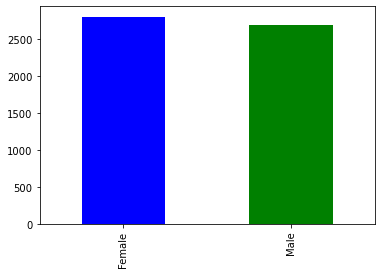

In [54]:
df['Gender'].value_counts().plot.bar(color=['blue','green'])

<AxesSubplot:>

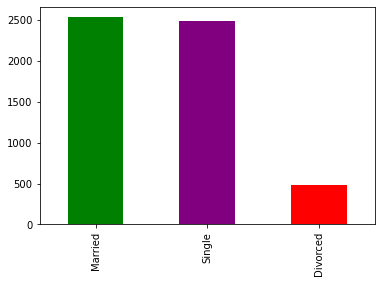

In [55]:
df['MaritalStatus'].value_counts().plot.bar(color=['green','purple','red'])

<AxesSubplot:>

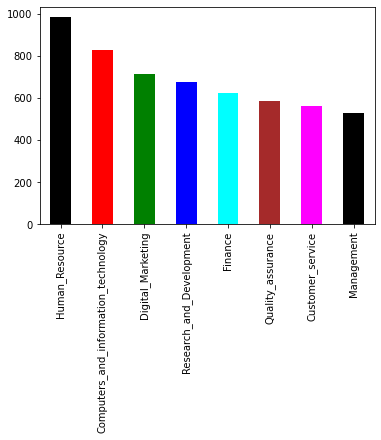

In [56]:
df['Department'].value_counts().plot.bar(color=['black','red','green','blue','cyan','brown','magenta'])

<AxesSubplot:>

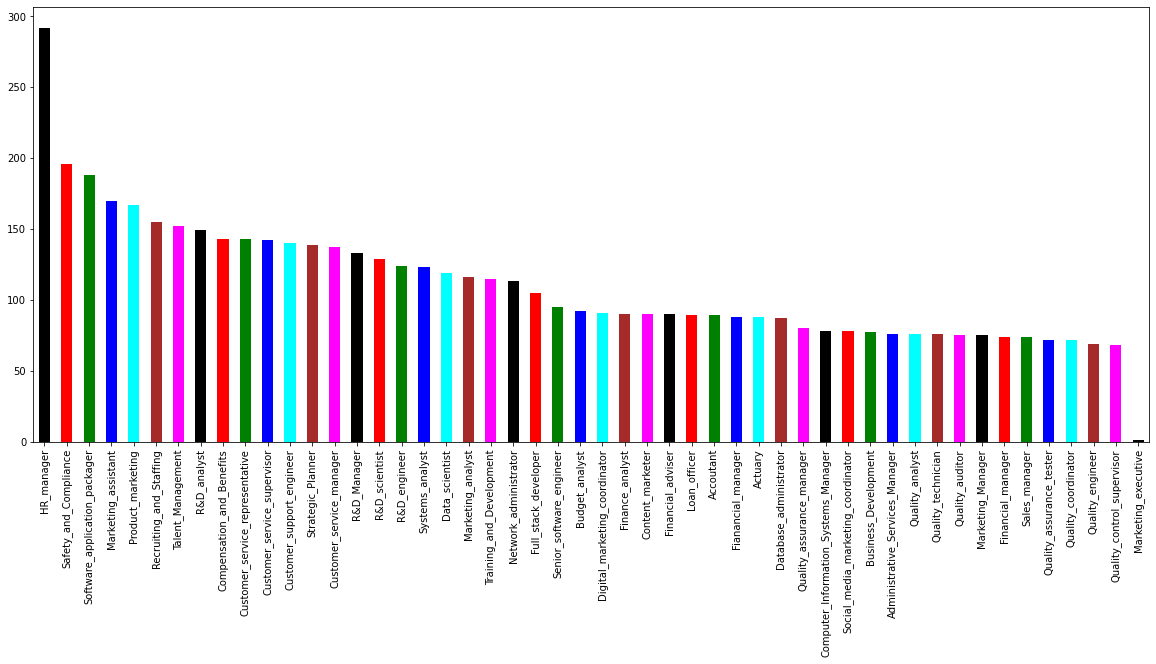

In [57]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
df['Job_role'].value_counts().plot.bar(color=['black','red','green','blue','cyan','brown','magenta'])

<AxesSubplot:>

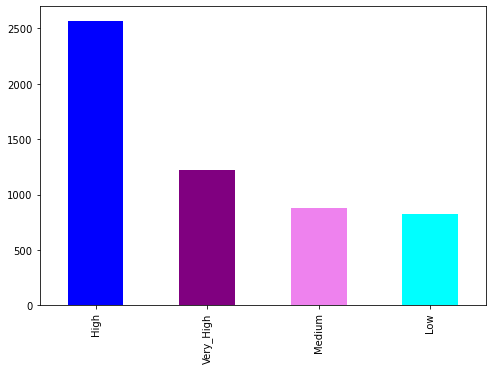

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5.5)
df['Work_Environment_Satisfaction_Level'].value_counts().plot.bar(color=['blue','purple','violet','cyan'])

<AxesSubplot:>

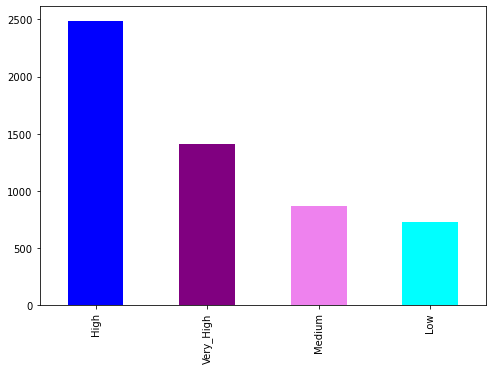

In [59]:
df['JobInvolvement'].value_counts().plot.bar(color=['blue','purple','violet','cyan'])

<AxesSubplot:>

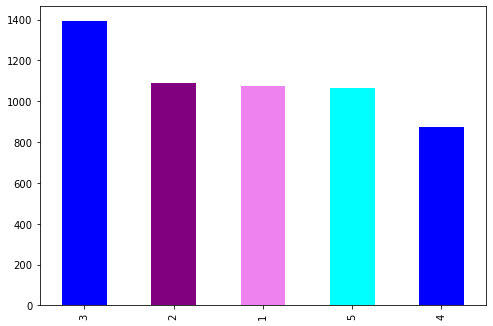

In [60]:
df['JobLevel'].value_counts().plot.bar(color=['blue','purple','violet','cyan'])

<AxesSubplot:>

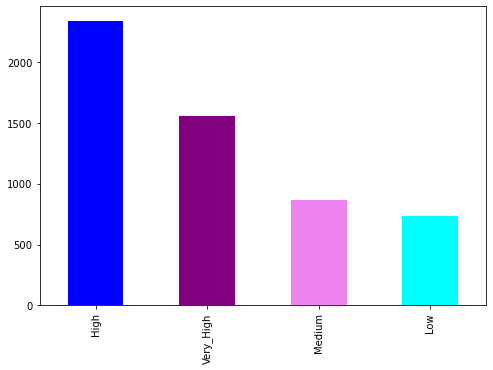

In [61]:
df['JobSatisfaction'].value_counts().plot.bar(color=['blue','purple','violet','cyan'])

In [62]:
def onehot_encode(df,columns):
    df=df.copy()
    dummies=pd.get_dummies(df[columns],prefix=columns)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(columns,axis=1)
    return df

In [63]:
columns=['Gender','MaritalStatus','Department','Job_role',
'Education_level',
'Work_Environment_Satisfaction_Level',
'JobInvolvement',
'JobSatisfaction',
'RelationshipSatisfaction',
'Work_Life_Balance',
'Behaviourial_Competence',
'On_Time_Delivery',
'Ticket_Solving_Management',
'Working_Status',
'Psycho_social_indicators',
'Feedback','Performance_Rating']
for i in columns:
    print(i,df[i].unique())

Gender ['Male' 'Female']
MaritalStatus ['Single' 'Married' 'Divorced']
Department ['Computers_and_information_technology' 'Finance' 'Human_Resource'
 'Customer_service' 'Digital_Marketing' 'Research_and_Development'
 'Management' 'Quality_assurance']
Job_role ['Database_administrator' 'Loan_officer' 'HR_manager'
 'Recruiting_and_Staffing' 'Financial_adviser' 'Actuary'
 'Customer_service_representative' 'Network_administrator'
 'Marketing_assistant' 'Fianancial_manager' 'Customer_support_engineer'
 'R&D_engineer' 'Product_marketing' 'Marketing_Manager'
 'Digital_marketing_coordinator' 'Compensation_and_Benefits'
 'Data_scientist' 'Budget_analyst' 'Quality_coordinator' 'Finance_analyst'
 'R&D_scientist' 'Talent_Management' 'Customer_service_supervisor'
 'Full_stack_developer' 'R&D_Manager' 'Quality_control_supervisor'
 'Content_marketer' 'Computer_Information_Systems_Manager'
 'Quality_analyst' 'Safety_and_Compliance' 'Training_and_Development'
 'Accoutant' 'Business_Development' 'Admini

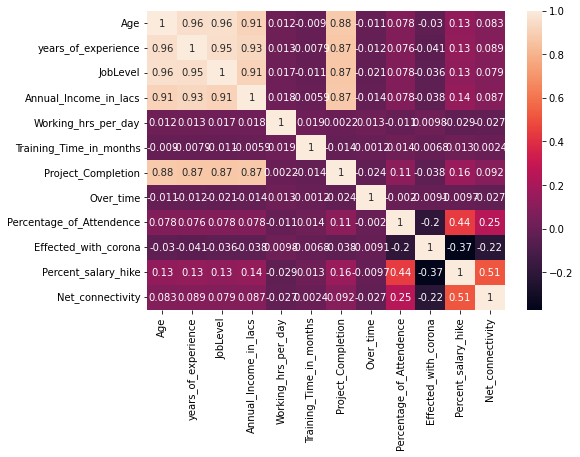

In [64]:
# drop single value columns and id values
df=df.drop(['Employee_ID'],axis=1)
#correlation matrix
sns.heatmap(df.corr(), annot=True)
#Binary encoding for having only two values 
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

#Ordinal Encoding for having more than two values
df['Education_level']=df['Education_level'].replace({'Bachelor':2, 'Master':3, 'Doctor':4, 'Below_PUC':0, 'PUC':1})
df['Work_Environment_Satisfaction_Level']=df['Work_Environment_Satisfaction_Level'].replace({'High':2, 'Very_High':3, 'Low':0, 'Medium':1})
df['JobInvolvement']=df['JobInvolvement'].replace({'High':2, 'Very_High':3, 'Low':0, 'Medium':1})
df['JobSatisfaction']=df['JobSatisfaction'].replace({'High':2, 'Very_High':3, 'Low':0, 'Medium':1})
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace({'High':2, 'Very_High':3, 'Low':0, 'Medium':1})
df['Behaviourial_Competence']=df['Behaviourial_Competence'].replace({'Very_good':4, 'Good':3, 'Excellent':5, 'Poor':0, 'Satisfactory':2, 'In_adequate':1})
df['Psycho_social_indicators']=df['Psycho_social_indicators'].replace({'Very_good':4, 'Good':3, 'Excellent':5, 'Poor':0, 'Satisfactory':2, 'In_adequate':1})
df['Work_Life_Balance']=df['Work_Life_Balance'].replace({'Better':2, 'Best':3, 'Bad':0, 'Good':1})
df['On_Time_Delivery']=df['On_Time_Delivery'].replace({'Excellent':4, 'good':3, 'Good':3, 'satistfactory':2, 'fair':1, 'Poor':0})
df['Ticket_Solving_Management']=df['Ticket_Solving_Management'].replace({'Excellent':4,'Good':3, 'Satisfactory':2, 'fair':1, 'Poor':0})
df['Feedback']=df['Feedback'].replace({'Outstanding':5, 'Very_good':4, 'Good':3, 'Poor':0, 'Satisfactory':2, 'Not_bad':1})
df['Performance_Rating']=df['Performance_Rating'].replace({'Outstanding':3, 'Excellent':2, 'Good':1, 'Low':0})

#One-Hot encoding
ohe = ['Department','Job_role','MaritalStatus','Working_Status']
df = pd.get_dummies(df, columns=ohe)

In [65]:
df.dtypes

Age                                    float64
years_of_experience                    float64
Gender                                   int64
Education_level                          int64
Work_Environment_Satisfaction_Level      int64
                                        ...   
MaritalStatus_Divorced                   uint8
MaritalStatus_Married                    uint8
MaritalStatus_Single                     uint8
Working_Status_WFH                       uint8
Working_Status_WFO                       uint8
Length: 88, dtype: object

In [66]:
df

,Age,years_of_experience,Gender,Education_level,Work_Environment_Satisfaction_Level,JobInvolvement,JobLevel,JobSatisfaction,Annual_Income_in_lacs,RelationshipSatisfaction,...,Job_role_Software_application_packager,Job_role_Strategic_Planner,Job_role_Systems_analyst,Job_role_Talent_Management,Job_role_Training_and_Development,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Working_Status_WFH,Working_Status_WFO
0,51.000000,26.0,1,2,2,2,4,3,17.054416,0,...,0,0,0,0,0,0,0,1,1,0
1,24.000000,2.0,0,2,2,3,1,2,6.000000,0,...,0,0,0,0,0,0,0,1,1,0
2,20.000000,1.0,1,2,3,2,1,2,5.000000,0,...,0,0,0,0,0,0,0,1,0,1
3,29.000000,3.0,0,3,3,3,2,2,6.000000,3,...,0,0,0,0,0,0,1,0,0,1
4,28.000000,4.0,1,3,2,1,1,2,8.000000,3,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,40.000000,15.0,0,2,1,2,3,2,19.000000,0,...,0,0,0,0,0,0,1,0,0,1
5496,30.000000,5.0,1,2,3,3,2,3,9.000000,3,...,0,0,0,0,0,0,1,0,0,1
5497,26.000000,2.0,0,2,0,0,1,0,6.000000,0,...,0,0,0,0,0,0,1,0,0,1
5498,44.000000,21.0,0,2,2,2,3,1,24.000000,2,...,0,0,0,0,0,0,1,0,1,0


In [67]:
#split df into X and Y
y=df['Performance_Rating']
x=df.drop('Performance_Rating',axis=1)

#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,shuffle=True,random_state=1)
    
#scale x
scaler=StandardScaler()
scaler.fit(x_test)
x_train=pd.DataFrame(scaler.fit_transform(x_train),index=x_train.index,columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)

In [68]:
print(x.shape, x_train.shape, x_test.shape)

(5500, 87) (4400, 87) (1100, 87)


In [69]:
x_train

,Age,years_of_experience,Gender,Education_level,Work_Environment_Satisfaction_Level,JobInvolvement,JobLevel,JobSatisfaction,Annual_Income_in_lacs,RelationshipSatisfaction,...,Job_role_Software_application_packager,Job_role_Strategic_Planner,Job_role_Systems_analyst,Job_role_Talent_Management,Job_role_Training_and_Development,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Working_Status_WFH,Working_Status_WFO
3332,0.073284,0.111817,1.018350,1.519932,0.253075,1.222237,0.042914,1.178506,0.563372,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,-0.995917,0.995917
2161,-0.264680,-0.339390,1.018350,-0.541628,-1.826347,-0.866651,0.042914,-1.910509,-0.770410,-0.446446,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,1.004099,-1.004099
3192,-0.011207,0.021576,1.018350,-0.541628,0.253075,-0.866651,0.042914,0.148834,0.341075,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,-0.995917,0.995917
2708,0.326756,0.382542,1.018350,1.519932,1.292786,0.177793,0.042914,1.178506,0.452224,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,1.004099,-1.004099
2139,0.918192,1.014232,-0.981981,0.489152,1.292786,1.222237,0.769144,1.178506,1.119115,-0.446446,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,-0.995917,0.995917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.002682,0.833749,-0.981981,0.489152,-1.826347,-1.911096,0.769144,-1.910509,0.785669,0.445230,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,1.004099,-1.004099
5192,1.002682,0.923991,-0.981981,-0.541628,-0.786636,0.177793,0.769144,0.148834,1.119115,-0.446446,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,-0.995917,0.995917
3980,1.509627,1.645923,-0.981981,-2.603188,-0.786636,0.177793,1.495375,0.148834,1.452560,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,-0.995917,0.995917
235,-0.349170,-0.429632,1.018350,0.489152,0.253075,0.177793,-0.683317,0.148834,-0.992706,0.445230,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,-0.995917,0.995917


In [70]:
y_train

3332    3
2161    0
3192    1
2708    3
2139    2
       ..
905     0
5192    2
3980    1
235     1
5157    3
Name: Performance_Rating, Length: 4400, dtype: int64

In [71]:
x_test

,Age,years_of_experience,Gender,Education_level,Work_Environment_Satisfaction_Level,JobInvolvement,JobLevel,JobSatisfaction,Annual_Income_in_lacs,RelationshipSatisfaction,...,Job_role_Software_application_packager,Job_role_Strategic_Planner,Job_role_Systems_analyst,Job_role_Talent_Management,Job_role_Training_and_Development,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Working_Status_WFH,Working_Status_WFO
4410,1.678609,1.916647,-0.981981,-1.572408,0.253075,0.177793,1.495375,-0.880837,1.452560,-1.338121,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,-0.995917,0.995917
2256,-0.349170,-0.519873,1.018350,-0.541628,1.292786,1.222237,0.042914,1.178506,-0.770410,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,-0.995917,0.995917
3684,-0.095698,-0.249149,1.018350,0.489152,1.292786,0.177793,0.042914,1.178506,-0.103519,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,1.004099,-1.004099
4706,0.157774,0.111817,1.018350,-0.541628,0.253075,0.177793,0.042914,1.178506,0.563372,-0.446446,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,-0.995917,0.995917
5429,1.509627,1.736164,1.018350,0.489152,0.253075,0.177793,1.495375,1.178506,1.341412,0.445230,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,1.004099,-1.004099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,-0.264680,-0.429632,1.018350,-1.572408,-1.826347,-1.911096,0.042914,-1.910509,-0.770410,1.336905,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,1.004099,-1.004099
1240,1.594118,1.645923,-0.981981,1.519932,-1.826347,-1.911096,1.495375,-0.880837,1.452560,0.445230,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,1.004099,-1.004099
2159,-1.278569,-1.151563,1.018350,0.489152,0.253075,0.177793,-1.409548,0.148834,-1.215003,0.445230,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,1.076067,-0.903289,1.004099,-1.004099
2687,1.509627,1.375198,1.018350,-0.541628,0.253075,1.222237,1.495375,1.178506,1.452560,-0.446446,...,-0.187218,-0.161615,-0.154823,-0.171699,-0.144505,-0.309221,-0.929310,1.107066,1.004099,-1.004099


In [72]:
y_test

4410    1
2256    3
3684    3
4706    3
5429    3
       ..
965     0
1240    0
2159    2
2687    3
2274    2
Name: Performance_Rating, Length: 1100, dtype: int64

In [73]:
models= {
    "Logistic Regression":LogisticRegression(),
    "k-Nearest Neighbors":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Support Vector Machine(Linear Kernal)": LinearSVC(),
    "Support Vector Machine(RBF Kernal)": SVC(),
    "Nureal Network":MLPClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gredient Boosting":GradientBoostingClassifier()
}
for name, model in models.items():
    model.fit(x_train,y_train)
    print(name+': trained')

Logistic Regression: trained
k-Nearest Neighbors: trained
Decision Tree: trained
Support Vector Machine(Linear Kernal): trained
Support Vector Machine(RBF Kernal): trained
Nureal Network: trained
Random Forest: trained
Gredient Boosting: trained


In [74]:
for name , model in models.items():
    print(name+ ": {:.2f}%".format(model.score(x_test,y_test)*100))

Logistic Regression: 96.55%
k-Nearest Neighbors: 79.00%
Decision Tree: 97.55%
Support Vector Machine(Linear Kernal): 89.73%
Support Vector Machine(RBF Kernal): 97.73%
Nureal Network: 97.00%
Random Forest: 98.64%
Gredient Boosting: 98.64%


In [75]:
 for name , model in models.items():
    print(name+ ": {:.2f}%".format(model.score(x_train,y_train)*100))

Logistic Regression: 98.16%
k-Nearest Neighbors: 88.39%
Decision Tree: 100.00%
Support Vector Machine(Linear Kernal): 91.86%
Support Vector Machine(RBF Kernal): 99.00%
Nureal Network: 100.00%
Random Forest: 100.00%
Gredient Boosting: 99.86%
